# Interpolation visualizer

### Parameters

In [2]:
N = 16      # Number of pixels by block
FRAC = 4    # Number of fractional pixels for interpolation (eg: 1/4 of resolution)
MODE = 0    # Select MC(0) or FME(1):
SEARCH = 2  # [Only for MC] Select Horizontal search(0), Vertical search(1) or Full search(2)
TAPS = 8    # Number of taps in the filter
I = 8       # Input size of the line 
S = 1       # Stride=1 means that the filter will deslocate 1 by 1 pixel at the time

### Filter coefficients

In [3]:
# Variable named just like in VTM
# const TFilterCoeff InterpolationFilter::m_affineLumaFilter[LUMA_INTERPOLATION_FILTER_SUB_SAMPLE_POSITIONS][NTAPS_LUMA] =
m_affineLumaFilter = [
                    [ 0,   0,  64,   0,   0, 0, 0, 0 ],
                    [ 1,  -3,  63,   4,  -2, 1, 0, 0 ],
                    [ 1,  -5,  62,   8,  -3, 1, 0, 0 ],
                    [ 2,  -8,  60,  13,  -4, 1, 0, 0 ],

                    [ 3, -10,  58,  17,  -5, 1, 0, 0 ],
                    [ 3, -11,  52,  26,  -8, 2, 0, 0 ],
                    [ 2,  -9,  47,  31, -10, 3, 0, 0 ],
                    [ 3, -11,  45,  34, -10, 3, 0, 0 ],

                    [ 3, -11,  40,  40, -11, 3, 0, 0 ],
                    [ 3, -10,  34,  45, -11, 3, 0, 0 ],
                    [ 3, -10,  31,  47,  -9, 2, 0, 0 ],
                    [ 2,  -8,  26,  52, -11, 3, 0, 0 ],

                    [ 1,  -5,  17,  58, -10, 3, 0, 0 ],
                    [ 1,  -4,  13,  60,  -8, 2, 0, 0 ],
                    [ 1,  -3,   8,  62,  -5, 1, 0, 0 ],
                    [ 1,  -2,   4,  63,  -3, 1, 0, 0 ]
                    ]

#### Other filters used for interpolation

In [4]:
# const TFilterCoeff InterpolationFilter::m_lumaFilter[LUMA_INTERPOLATION_FILTER_SUB_SAMPLE_POSITIONS][NTAPS_LUMA]
m_lumaFilter = [
  [  0, 0,   0, 64,  0,   0,  0,  0 ],
  [  0, 1,  -3, 63,  4,  -2,  1,  0 ],
  [ -1, 2,  -5, 62,  8,  -3,  1,  0 ],
  [ -1, 3,  -8, 60, 13,  -4,  1,  0 ],
  [ -1, 4, -10, 58, 17,  -5,  1,  0 ],
  [ -1, 4, -11, 52, 26,  -8,  3, -1 ],
  [ -1, 3,  -9, 47, 31, -10,  4, -1 ],
  [ -1, 4, -11, 45, 34, -10,  4, -1 ],
  [ -1, 4, -11, 40, 40, -11,  4, -1 ],
  [ -1, 4, -10, 34, 45, -11,  4, -1 ],
  [ -1, 4, -10, 31, 47,  -9,  3, -1 ],
  [ -1, 3,  -8, 26, 52, -11,  4, -1 ],
  [  0, 1,  -5, 17, 58, -10,  4, -1 ],
  [  0, 1,  -4, 13, 60,  -8,  3, -1 ],
  [  0, 1,  -3,  8, 62,  -5,  2, -1 ],
  [  0, 1,  -2,  4, 63,  -3,  1,  0 ]
]

# const TFilterCoeff InterpolationFilter::m_lumaFilterRPR1[LUMA_INTERPOLATION_FILTER_SUB_SAMPLE_POSITIONS][NTAPS_LUMA] =
m_lumaFilterRPR1 = [
  [ -1, -5, 17, 42, 17, -5, -1,  0 ],
  [  0, -5, 15, 41, 19, -5, -1,  0 ],
  [  0, -5, 13, 40, 21, -4, -1,  0 ],
  [  0, -5, 11, 39, 24, -4, -2,  1 ],
  [  0, -5,  9, 38, 26, -3, -2,  1 ],
  [  0, -5,  7, 38, 28, -2, -3,  1 ],
  [  1, -5,  5, 36, 30, -1, -3,  1 ],
  [  1, -4,  3, 35, 32,  0, -4,  1 ],
  [  1, -4,  2, 33, 33,  2, -4,  1 ],
  [  1, -4,  0, 32, 35,  3, -4,  1 ],
  [  1, -3, -1, 30, 36,  5, -5,  1 ],
  [  1, -3, -2, 28, 38,  7, -5,  0 ],
  [  1, -2, -3, 26, 38,  9, -5,  0 ],
  [  1, -2, -4, 24, 39, 11, -5,  0 ],
  [  0, -1, -4, 21, 40, 13, -5,  0 ],
  [  0, -1, -5, 19, 41, 15, -5,  0 ]
]

# const TFilterCoeff InterpolationFilter::m_lumaFilterRPR2[LUMA_INTERPOLATION_FILTER_SUB_SAMPLE_POSITIONS][NTAPS_LUMA] =
m_lumaFilterRPR2 = [
  [ -4,  2, 20, 28, 20,  2, -4,  0 ],
  [ -4,  0, 19, 29, 21,  5, -4, -2 ],
  [ -4, -1, 18, 29, 22,  6, -4, -2 ],
  [ -4, -1, 16, 29, 23,  7, -4, -2 ],
  [ -4, -1, 16, 28, 24,  7, -4, -2 ],
  [ -4, -1, 14, 28, 25,  8, -4, -2 ],
  [ -3, -3, 14, 27, 26,  9, -3, -3 ],
  [ -3, -1, 12, 28, 25, 10, -4, -3 ],
  [ -3, -3, 11, 27, 27, 11, -3, -3 ],
  [ -3, -4, 10, 25, 28, 12, -1, -3 ],
  [ -3, -3,  9, 26, 27, 14, -3, -3 ],
  [ -2, -4,  8, 25, 28, 14, -1, -4 ],
  [ -2, -4,  7, 24, 28, 16, -1, -4 ],
  [ -2, -4,  7, 23, 29, 16, -1, -4 ],
  [ -2, -4,  6, 22, 29, 18, -1, -4 ],
  [ -2, -4,  5, 21, 29, 19,  0, -4 ]
]

# const TFilterCoeff InterpolationFilter::m_affineLumaFilterRPR1[LUMA_INTERPOLATION_FILTER_SUB_SAMPLE_POSITIONS][NTAPS_LUMA] =
m_affineLumaFilterRPR1 = [
  [  -6, 17, 42, 17, -5, -1,  0, 0 ],
  [  -5, 15, 41, 19, -5, -1,  0, 0 ],
  [  -5, 13, 40, 21, -4, -1,  0, 0 ],
  [  -5, 11, 39, 24, -4, -1,  0, 0 ],
  [  -5,  9, 38, 26, -3, -1,  0, 0 ],
  [  -5,  7, 38, 28, -2, -2,  0, 0 ],
  [  -4,  5, 36, 30, -1, -2,  0, 0 ],
  [  -3,  3, 35, 32,  0, -3,  0, 0 ],
  [  -3,  2, 33, 33,  2, -3,  0, 0 ],
  [  -3,  0, 32, 35,  3, -3,  0, 0 ],
  [  -2, -1, 30, 36,  5, -4,  0, 0 ],
  [  -2, -2, 28, 38,  7, -5,  0, 0 ],
  [  -1, -3, 26, 38,  9, -5,  0, 0 ],
  [  -1, -4, 24, 39, 11, -5,  0, 0 ],
  [  -1, -4, 21, 40, 13, -5,  0, 0 ],
  [  -1, -5, 19, 41, 15, -5,  0, 0 ]
]

# const TFilterCoeff InterpolationFilter::m_affineLumaFilterRPR2[LUMA_INTERPOLATION_FILTER_SUB_SAMPLE_POSITIONS][NTAPS_LUMA] =
m_affineLumaFilterRPR2 = [
  [  -2, 20, 28, 20,  2, -4,  0, 0 ],
  [  -4, 19, 29, 21,  5, -6,  0, 0 ],
  [  -5, 18, 29, 22,  6, -6,  0, 0 ],
  [  -5, 16, 29, 23,  7, -6,  0, 0 ],
  [  -5, 16, 28, 24,  7, -6,  0, 0 ],
  [  -5, 14, 28, 25,  8, -6,  0, 0 ],
  [  -6, 14, 27, 26,  9, -6,  0, 0 ],
  [  -4, 12, 28, 25, 10, -7,  0, 0 ],
  [  -6, 11, 27, 27, 11, -6,  0, 0 ],
  [  -7, 10, 25, 28, 12, -4,  0, 0 ],
  [  -6,  9, 26, 27, 14, -6,  0, 0 ],
  [  -6,  8, 25, 28, 14, -5,  0, 0 ],
  [  -6,  7, 24, 28, 16, -5,  0, 0 ],
  [  -6,  7, 23, 29, 16, -5,  0, 0 ],
  [  -6,  6, 22, 29, 18, -5,  0, 0 ],
  [  -6,  5, 21, 29, 19, -4,  0, 0 ]
]

# const TFilterCoeff InterpolationFilter::m_lumaAltHpelIFilter[NTAPS_LUMA] = 
m_lumaAltHpelIFilter = [  0, 3, 9, 20, 20, 9, 3, 0 ]

# const TFilterCoeff InterpolationFilter::m_chromaFilter[CHROMA_INTERPOLATION_FILTER_SUB_SAMPLE_POSITIONS][NTAPS_CHROMA] =
m_chromaFilter = [
  [  0, 64,  0,  0 ],
  [ -1, 63,  2,  0 ],
  [ -2, 62,  4,  0 ],
  [ -2, 60,  7, -1 ],
  [ -2, 58, 10, -2 ],
  [ -3, 57, 12, -2 ],
  [ -4, 56, 14, -2 ],
  [ -4, 55, 15, -2 ],
  [ -4, 54, 16, -2 ],
  [ -5, 53, 18, -2 ],
  [ -6, 52, 20, -2 ],
  [ -6, 49, 24, -3 ],
  [ -6, 46, 28, -4 ],
  [ -5, 44, 29, -4 ],
  [ -4, 42, 30, -4 ],
  [ -4, 39, 33, -4 ],
  [ -4, 36, 36, -4 ],
  [ -4, 33, 39, -4 ],
  [ -4, 30, 42, -4 ],
  [ -4, 29, 44, -5 ],
  [ -4, 28, 46, -6 ],
  [ -3, 24, 49, -6 ],
  [ -2, 20, 52, -6 ],
  [ -2, 18, 53, -5 ],
  [ -2, 16, 54, -4 ],
  [ -2, 15, 55, -4 ],
  [ -2, 14, 56, -4 ],
  [ -2, 12, 57, -3 ],
  [ -2, 10, 58, -2 ],
  [ -1,  7, 60, -2 ],
  [  0,  4, 62, -2 ],
  [  0,  2, 63, -1 ],
]

# const TFilterCoeff InterpolationFilter::m_chromaFilterRPR1[CHROMA_INTERPOLATION_FILTER_SUB_SAMPLE_POSITIONS][NTAPS_CHROMA] =
m_chromaFilterRPR1 = [
  [ 12, 40, 12,  0 ],
  [ 11, 40, 13,  0 ],
  [ 10, 40, 15, -1 ],
  [  9, 40, 16, -1 ],
  [  8, 40, 17, -1 ],
  [  8, 39, 18, -1 ],
  [  7, 39, 19, -1 ],
  [  6, 38, 21, -1 ],
  [  5, 38, 22, -1 ],
  [  4, 38, 23, -1 ],
  [  4, 37, 24, -1 ],
  [  3, 36, 25,  0 ],
  [  3, 35, 26,  0 ],
  [  2, 34, 28,  0 ],
  [  2, 33, 29,  0 ],
  [  1, 33, 30,  0 ],
  [  1, 31, 31,  1 ],
  [  0, 30, 33,  1 ],
  [  0, 29, 33,  2 ],
  [  0, 28, 34,  2 ],
  [  0, 26, 35,  3 ],
  [  0, 25, 36,  3 ],
  [ -1, 24, 37,  4 ],
  [ -1, 23, 38,  4 ],
  [ -1, 22, 38,  5 ],
  [ -1, 21, 38,  6 ],
  [ -1, 19, 39,  7 ],
  [ -1, 18, 39,  8 ],
  [ -1, 17, 40,  8 ],
  [ -1, 16, 40,  9 ],
  [ -1, 15, 40, 10 ],
  [  0, 13, 40, 11 ],
]

# const TFilterCoeff InterpolationFilter::m_chromaFilterRPR2[CHROMA_INTERPOLATION_FILTER_SUB_SAMPLE_POSITIONS][NTAPS_CHROMA] =
m_chromaFilterRPR2 = [
  [ 17, 30, 17,  0 ],
  [ 17, 30, 18, -1 ],
  [ 16, 30, 18,  0 ],
  [ 16, 30, 18,  0 ],
  [ 15, 30, 18,  1 ],
  [ 14, 30, 18,  2 ],
  [ 13, 29, 19,  3 ],
  [ 13, 29, 19,  3 ],
  [ 12, 29, 20,  3 ],
  [ 11, 28, 21,  4 ],
  [ 10, 28, 22,  4 ],
  [ 10, 27, 22,  5 ],
  [  9, 27, 23,  5 ],
  [  9, 26, 24,  5 ],
  [  8, 26, 24,  6 ],
  [  7, 26, 25,  6 ],
  [  7, 25, 25,  7 ],
  [  6, 25, 26,  7 ],
  [  6, 24, 26,  8 ],
  [  5, 24, 26,  9 ],
  [  5, 23, 27,  9 ],
  [  5, 22, 27, 10 ],
  [  4, 22, 28, 10 ],
  [  4, 21, 28, 11 ],
  [  3, 20, 29, 12 ],
  [  3, 19, 29, 13 ],
  [  3, 19, 29, 13 ],
  [  2, 18, 30, 14 ],
  [  1, 18, 30, 15 ],
  [  0, 18, 30, 16 ],
  [  0, 18, 30, 16 ],
  [ -1, 18, 30, 17 ]
]

# const TFilterCoeff InterpolationFilter::m_bilinearFilterPrec4[LUMA_INTERPOLATION_FILTER_SUB_SAMPLE_POSITIONS][NTAPS_BILINEAR] =
m_bilinearFilterPrec4 = [
  [ 16,  0, ],
  [ 15,  1, ],
  [ 14,  2, ],
  [ 13, 3, ],
  [ 12, 4, ],
  [ 11, 5, ],
  [ 10, 6, ],
  [ 9, 7, ],
  [ 8, 8, ],
  [ 7, 9, ],
  [ 6, 10, ],
  [ 5, 11, ],
  [ 4, 12, ],
  [ 3, 13, ],
  [ 2, 14, ],
  [ 1, 15, ]
]

### Imports

In [13]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

### Calculated parameters

In [6]:
# Calculating padding
PADDING = math.ceil((TAPS - 1) / 2) - 1

# Calculating one line size (considering a squared-block)
LINE = math.sqrt(N)

# Ensure that it results in an integer:
inteiro = (I - TAPS + 2*PADDING) / (S + 1)

print("Padding = ", PADDING)
print("Integer = ", inteiro)

Padding =  3
Integer =  3.0


### Basic setup

Matrix size:  19 x 19


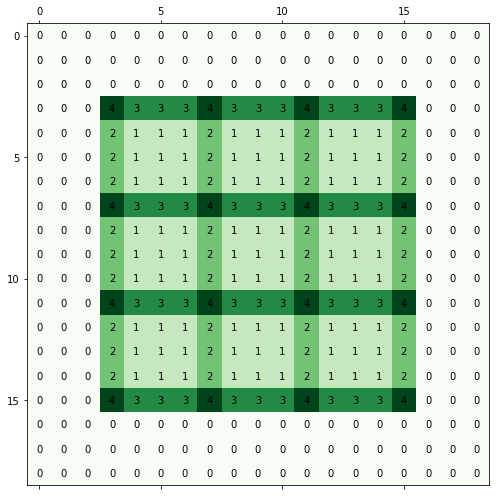

In [7]:
# Size of the ploted image 
plt.rcParams["figure.figsize"]=[7,7] 
plt.rcParams["figure.autolayout"]=True
fig, ax = plt.subplots()

# Size of the matrix max_val x max_val
max_val = int(LINE + 2*PADDING + (FRAC-1)*(LINE-1))   

# MATRIX[HORIZONTAL, VERTICAL]
matrix = np.zeros((max_val, max_val), dtype=np.uint8)

# The original pixels from the input block
for w in range(0,max_val-PADDING,FRAC):
    for h in range(0,max_val-PADDING,FRAC):
        matrix[PADDING+w, PADDING+h] = 4

# Horizontally interpolated pixels (1st pass)
for w in range(0,max_val-PADDING,FRAC):             # Loop to run between lines
    # for h in range(0,max_val-PADDING,FRAC):       # @bnagai: for padding only in left-superior sides
    for h in range(0,max_val-PADDING-FRAC,FRAC):    # Loop to run between columns        
        for f in range(0,FRAC-1,1):                 # Loop to print every padding space between integers
            matrix[PADDING+w, PADDING+h+1+f] = 3

# Vertically interpolated pixels (2nd pass)
for w in range(0,max_val-PADDING-FRAC,FRAC):        # Loop to run between lines
# for w in range(0,max_val-PADDING-FRAC,FRAC):      # @bnagai: for padding only in left-superior sides
    for h in range(0,max_val-PADDING,FRAC):         # Loop to run between columns
        for f in range(0,FRAC-1,1):                 # Loop to print every padding space between integers
            matrix[PADDING+1+w+f,PADDING+h] = 2

# Vertical and dependent interpolated pixels (2nd pass)
for w in range(0,max_val-PADDING-FRAC,FRAC):        # Loop to run between lines
    for h in range(1,max_val-PADDING-FRAC,1):       # Loop to run between columns
        if h%FRAC != 0:                             # Check if it isnt already filled
            for f in range(0,FRAC-1,1):             # Loop to print every padding space between integers
                matrix[PADDING+1+w+f,PADDING+h] = 1

# Define the colors of the pixels 
ax.matshow(matrix, cmap='Greens')

# Write the number of each pixel
for i in range(max_val):
    for j in range(max_val):
        c = matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

# Print the matriz
print('Matrix size: ', max_val, 'x', max_val)
plt.show()

### Trying interpolation with given integer block values

Matrix size:  19 x 19


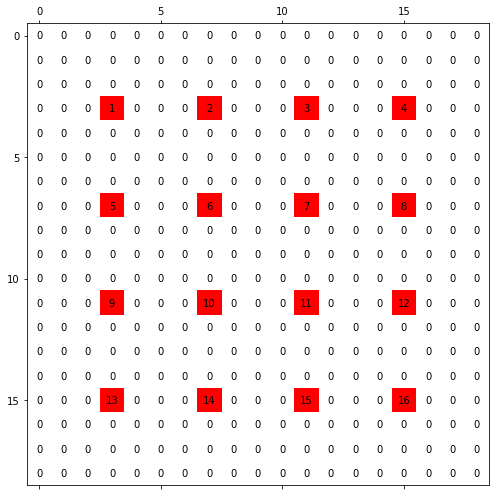

In [19]:
# Size of the ploted image 
plt.rcParams["figure.figsize"]=[7,7] 
plt.rcParams["figure.autolayout"]=True
fig, mx = plt.subplots()

# Size of matrix size_mx x size_mx
size_mx = int(LINE + 2*PADDING + (FRAC-1)*(LINE-1))   

# MATRIX[HORIZONTAL, VERTICAL]
trial_mx = np.zeros((size_mx, size_mx), dtype=np.uint8)

# The original pixels from the input block
int_block = 1
for w in range(0,size_mx-PADDING,FRAC):
    for h in range(0,size_mx-PADDING,FRAC):
        trial_mx[PADDING+w, PADDING+h] = int_block
        int_block = int_block + 1

# Horizontally interpolated pixels (1st pass)
# for w in range(0,size_mx-PADDING,FRAC):             # Loop to run between lines
#     # for h in range(0,size_mx-PADDING,FRAC):       # @bnagai: for padding only in left-superior sides
#     for h in range(0,size_mx-PADDING-FRAC,FRAC):    # Loop to run between columns        
#         for f in range(0,FRAC-1,1):                 # Loop to print every padding space between integers
#             trial_mx[PADDING+w, PADDING+h+1+f] = 3

# Vertically interpolated pixels (2nd pass)
# for w in range(0,size_mx-PADDING-FRAC,FRAC):        # Loop to run between lines
# # for w in range(0,size_mx-PADDING-FRAC,FRAC):      # @bnagai: for padding only in left-superior sides
#     for h in range(0,size_mx-PADDING,FRAC):         # Loop to run between columns
#         for f in range(0,FRAC-1,1):                 # Loop to print every padding space between integers
#             trial_mx[PADDING+1+w+f,PADDING+h] = 2

# Vertical and dependent interpolated pixels (2nd pass)
# for w in range(0,size_mx-PADDING-FRAC,FRAC):        # Loop to run between lines
#     for h in range(1,size_mx-PADDING-FRAC,1):       # Loop to run between columns
#         if h%FRAC != 0:                             # Check if it isnt already filled
#             for f in range(0,FRAC-1,1):             # Loop to print every padding space between integers
#                 trial_mx[PADDING+1+w+f,PADDING+h] = 1

# Defining color map 
cmap_mx = ListedColormap(['w','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r'])

# Define the colors of the pixels 
mx.matshow(trial_mx, cmap=cmap_mx)

# Write the number of each pixel
for i in range(size_mx):
    for j in range(size_mx):
        c = trial_mx[j,i]
        mx.text(i, j, str(c), va='center', ha='center')

# Print the matriz
print('Matrix size: ', size_mx, 'x', size_mx)
plt.show()

#### Legend

 0 = Padding
 
 4 = Original pixels from block 

 3 = Horizontaly generated pixels in 1st pass

 2 = Verticaly generated pixels in 2nd pass
 
 1 = Dependent verticaly generated pixels in 2nd pass

supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 
'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

## Motion Compensation (MC)

X and Y are the vectors generated for affine transformation.

Their format are fixed point ?

#### First case: X and Y components are integers

In [9]:
# Nothing to do, just foward the input

#### Second case: X or Y component is fractional

In [10]:
# Second test

#### Third case: X and Y components are fractional

## Fractional Motion Estimation (FME)